In [1]:
import pandas as pd
import numpy as np
import sqlite3
import mplfinance as fplt
import datetime

In [22]:
connection = sqlite3.connect("../data/GBPUSD.db")

cursor = connection.cursor()

count = 0

index = []
data = []
for row in cursor.execute('SELECT * FROM MT4__M00030;'):
    if count == 20:
        break
    
    index.append(row[0])
    data.append(row[1:])
    
    count += 1

connection.close()

In [30]:
index[:10]

[978483600,
 978485400,
 978487200,
 978489000,
 978490800,
 978492600,
 978494400,
 978496200,
 978498000,
 978499800]

In [31]:
index = pd.Series(index, name='Date')

In [32]:
index.head()

0    978483600
1    978485400
2    978487200
3    978489000
4    978490800
Name: Date, dtype: int64

In [33]:
index = pd.to_datetime(index, unit='s')

In [34]:
index.head()

0   2001-01-03 01:00:00
1   2001-01-03 01:30:00
2   2001-01-03 02:00:00
3   2001-01-03 02:30:00
4   2001-01-03 03:00:00
Name: Date, dtype: datetime64[ns]

In [29]:
data[:10]

[(1.5021, 1.5021, 1.5015, 1.5017),
 (1.5016, 1.5016, 1.5009, 1.5009),
 (1.502, 1.502, 1.5005, 1.5014),
 (1.5014, 1.5015, 1.5007, 1.5011),
 (1.5011, 1.5025, 1.5011, 1.5023),
 (1.5023, 1.503, 1.5023, 1.5025),
 (1.5025, 1.503, 1.5023, 1.5029),
 (1.5029, 1.503, 1.5028, 1.5028),
 (1.5028, 1.5028, 1.5024, 1.5025),
 (1.5025, 1.5025, 1.502, 1.5022)]

In [38]:
df_segment = pd.DataFrame(data=data, index=index, columns=['Open', 'High', 'Low', 'Close'])

In [42]:
df_segment.head()

,Open,High,Low,Close
Date,,,,
2001-01-03 01:00:00,1.5021,1.5021,1.5015,1.5017
2001-01-03 01:30:00,1.5016,1.5016,1.5009,1.5009
2001-01-03 02:00:00,1.5020,1.5020,1.5005,1.5014
2001-01-03 02:30:00,1.5014,1.5015,1.5007,1.5011
2001-01-03 03:00:00,1.5011,1.5025,1.5011,1.5023


In [40]:
df_segment.index

DatetimeIndex(['2001-01-03 01:00:00', '2001-01-03 01:30:00',
               '2001-01-03 02:00:00', '2001-01-03 02:30:00',
               '2001-01-03 03:00:00', '2001-01-03 03:30:00',
               '2001-01-03 04:00:00', '2001-01-03 04:30:00',
               '2001-01-03 05:00:00', '2001-01-03 05:30:00',
               '2001-01-03 06:00:00', '2001-01-03 06:30:00',
               '2001-01-03 07:00:00', '2001-01-03 07:30:00',
               '2001-01-03 08:00:00', '2001-01-03 08:30:00',
               '2001-01-03 09:00:00', '2001-01-03 09:30:00',
               '2001-01-03 10:00:00', '2001-01-03 10:30:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

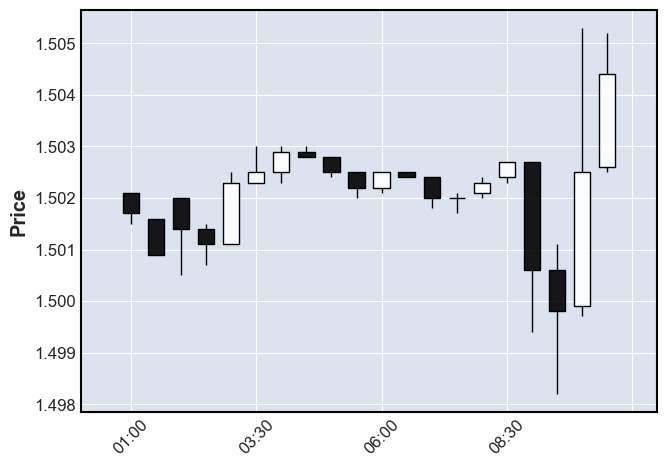

In [43]:
fplt.plot(df_segment, type='candle', volume=False)

In [46]:
type(df_segment.index)

pandas.core.indexes.datetimes.DatetimeIndex